# Import 

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)



# Load data

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)
df.head(3)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12


# Explore data

In [4]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({
                        'dtype':df.dtypes,
                        '# null': df.isna().sum(),
                        'null (%)': df.isna().sum()/len(df)*100,
                        'nunique':df.nunique(),
                        "min":df.min(),
                        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()
summarize_df(df)



,Column,dtype,# null,null (%),nunique,min,max
0,school,object,0,0.0,2,GP,MS
1,sex,object,0,0.0,2,F,M
2,age,int64,0,0.0,8,15,22
3,address,object,0,0.0,2,R,U
4,famsize,object,0,0.0,2,GT3,LE3
5,Pstatus,object,0,0.0,2,A,T
6,Medu,int64,0,0.0,5,0,4
7,Fedu,int64,0,0.0,5,0,4
8,Mjob,object,0,0.0,5,at_home,teacher
9,Fjob,object,0,0.0,5,at_home,teacher


In [5]:
## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'



Text(0.5, 1.0, 'Distribution of Final Grades')

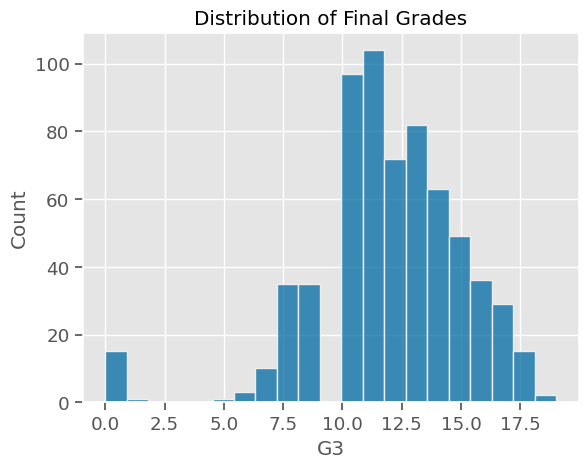

In [6]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades")


In [7]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")



Python 3.9.13
sklearn version: 1.1.3


# Selecting Our Features
If we wanted to make recommendations to the school district on how to identify and help students that will perform poorly by period 3, we should think about what features make the most sense to include.
There are 2 main approaches we could use, depending on what use case we are addressing for our stakeholders.
1) For example, if our primary goal is to just identify 3rd period students that will perform poorly, then including G1 and G2 would make sense.

2) However, if our primary goal is to identify which INCOMING students will perform poorly by their 3rd period, then we would NOT include G1 or G2, since the school will not have those grades for brand new incoming students.

We will start our analysis by addressing the first use case, identifying 3rd period students that will perform poorly, so we will include G1 and G2.

## Train Test Split

In [8]:
## Make x and y variables
y = df['G3'].copy()
X = df.drop(columns=['G3']).copy()
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
54,GP,F,15,U,LE3,A,3,3,other,other,other,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,3,4,4,4,1,0,13,12
208,GP,M,16,U,GT3,T,2,3,other,other,home,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,3,3,1,1,3,0,13,12
23,GP,M,16,U,LE3,T,2,2,other,other,reputation,mother,2,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,2,4,5,2,10,10
547,MS,M,16,R,LE3,T,4,1,other,at_home,other,father,1,1,0,no,no,no,no,yes,yes,yes,no,4,1,2,2,1,2,0,10,11
604,MS,F,18,U,GT3,T,1,1,at_home,services,course,mother,3,2,1,no,no,no,no,yes,no,no,no,4,4,2,1,2,2,2,9,10


## Preprocessing + ColumnTransformer

In [9]:
## make categorical selector and verify it works 
cat_sel = make_column_selector(dtype_include='object')
cat_sel(X_train)



['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
## make numeric selector and verify it works 
num_sel = make_column_selector(dtype_include='number')
num_sel(X_train)



['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

## Make a column transform
There is no missing values and we will not scale data just need use ohe in cal_sel 

In [11]:
#Create a OneHotEncoder for one-hot encoding the categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_tuple = (ohe, cat_sel)

In [12]:
preprocessor = make_column_transformer(cat_tuple, remainder = 'passthrough')

In [13]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['onehotencoder__school_GP', 'onehotencoder__school_MS',
       'onehotencoder__sex_F', 'onehotencoder__sex_M',
       'onehotencoder__address_R', 'onehotencoder__address_U',
       'onehotencoder__famsize_GT3', 'onehotencoder__famsize_LE3',
       'onehotencoder__Pstatus_A', 'onehotencoder__Pstatus_T',
       'onehotencoder__Mjob_at_home', 'onehotencoder__Mjob_health',
       'onehotencoder__Mjob_other', 'onehotencoder__Mjob_services',
       'onehotencoder__Mjob_teacher', 'onehotencoder__Fjob_at_home',
       'onehotencoder__Fjob_health', 'onehotencoder__Fjob_other',
       'onehotencoder__Fjob_services', 'onehotencoder__Fjob_teacher',
       'onehotencoder__reason_course', 'onehotencoder__reason_home',
       'onehotencoder__reason_other', 'onehotencoder__reason_reputation',
       'onehotencoder__guardian_father', 'onehotencoder__guardian_mother',
       'onehotencoder__guardian_other', 'onehotencoder__schoolsup_no',
       'onehotencoder__schoolsup_yes', 'onehotencoder__fams

We can use verbose_feature_names_out=False in preprocessor te get only feature names 

In [14]:
## make the preprocessing column transformer
preprocessor1 = make_column_transformer(cat_tuple, remainder = 'passthrough', verbose_feature_names_out=False)

## fit column transformer and run get_feature_names_out
preprocessor1.fit(X_train)
feature_names = preprocessor1.get_feature_names_out()
feature_names


array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes',
       'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2'], dtype=object)

# Create a preprocessed DataFrame for our training set.

In [15]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)



,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0


In [16]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)



,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
104,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,4.0,1.0,2.0,0.0,5.0,4.0,4.0,1.0,1.0,1.0,0.0,16.0,16.0
284,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,18.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,5.0,2.0,5.0,5.0,4.0,7.0,8.0
579,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,18.0,1.0,3.0,1.0,1.0,0.0,4.0,3.0,3.0,2.0,3.0,3.0,0.0,9.0,10.0


# RandomForestRegressor

In [17]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")


In [18]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)



Training Data:	R^2= 0.98	RMSE= 0.51
Test Data:	R^2= 0.82	RMSE= 1.27


## Extracting Feature Importances

In [19]:
reg.feature_importances_



array([1.23108785e-03, 1.63996406e-03, 1.80682529e-03, 1.38529016e-03,
       1.20528955e-03, 8.72894327e-04, 1.13592953e-03, 5.22535217e-04,
       3.71051354e-04, 2.19292172e-04, 6.86694740e-04, 4.21203554e-04,
       1.47141460e-03, 7.74048020e-04, 4.64734086e-03, 6.19396747e-04,
       6.19140624e-04, 2.07164561e-03, 1.88301388e-03, 3.01633549e-04,
       1.28632282e-03, 1.64186842e-03, 7.21822082e-03, 1.01932343e-03,
       3.26004040e-03, 9.53545036e-04, 7.39684124e-04, 1.39384054e-03,
       1.21569011e-03, 2.84149500e-03, 2.02039695e-03, 2.28506124e-04,
       4.93472098e-04, 7.02565037e-04, 5.58454864e-04, 1.05786793e-03,
       1.06176299e-03, 2.53541798e-04, 6.50640107e-04, 5.56210205e-04,
       4.76592441e-04, 6.74813237e-04, 7.36059980e-04, 1.03271855e-02,
       4.53845310e-03, 3.21326105e-03, 6.74840549e-03, 2.22697961e-03,
       3.55414456e-03, 2.91012404e-03, 6.34117593e-03, 5.38334674e-03,
       7.24455421e-03, 3.32260960e-03, 4.17120017e-03, 2.17656308e-02,
      

In [20]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)



58
58


True

## Saving the importances as a Pandas Series

In [21]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances



school_GP            0.001231
school_MS            0.001640
sex_F                0.001807
sex_M                0.001385
address_R            0.001205
address_U            0.000873
famsize_GT3          0.001136
famsize_LE3          0.000523
Pstatus_A            0.000371
Pstatus_T            0.000219
Mjob_at_home         0.000687
Mjob_health          0.000421
Mjob_other           0.001471
Mjob_services        0.000774
Mjob_teacher         0.004647
Fjob_at_home         0.000619
Fjob_health          0.000619
Fjob_other           0.002072
Fjob_services        0.001883
Fjob_teacher         0.000302
reason_course        0.001286
reason_home          0.001642
reason_other         0.007218
reason_reputation    0.001019
guardian_father      0.003260
guardian_mother      0.000954
guardian_other       0.000740
schoolsup_no         0.001394
schoolsup_yes        0.001216
famsup_no            0.002841
famsup_yes           0.002020
paid_no              0.000229
paid_yes             0.000493
activities

In [22]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=True)
sorted_importance



Pstatus_T            0.000219
paid_no              0.000229
higher_no            0.000254
Fjob_teacher         0.000302
Pstatus_A            0.000371
Mjob_health          0.000421
internet_yes         0.000477
paid_yes             0.000493
famsize_LE3          0.000523
internet_no          0.000556
activities_yes       0.000558
Fjob_health          0.000619
Fjob_at_home         0.000619
higher_yes           0.000651
romantic_no          0.000675
Mjob_at_home         0.000687
activities_no        0.000703
romantic_yes         0.000736
guardian_other       0.000740
Mjob_services        0.000774
address_U            0.000873
guardian_mother      0.000954
reason_reputation    0.001019
nursery_no           0.001058
nursery_yes          0.001062
famsize_GT3          0.001136
address_R            0.001205
schoolsup_yes        0.001216
school_GP            0.001231
reason_course        0.001286
sex_M                0.001385
schoolsup_no         0.001394
Mjob_other           0.001471
school_MS 

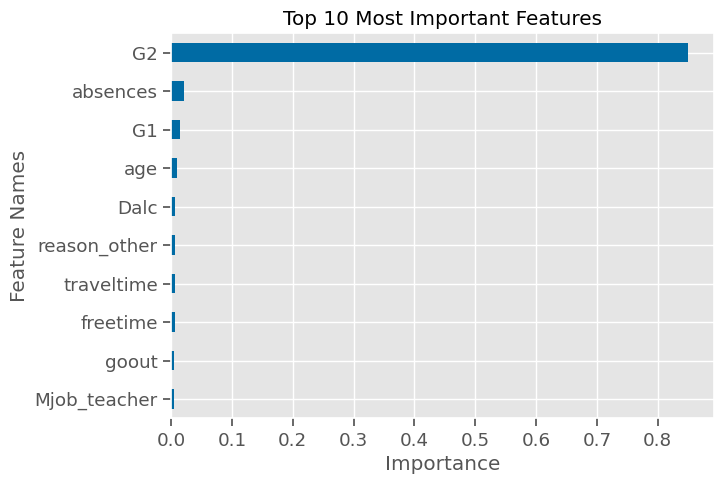

In [23]:
## plotting top 10 importances
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');




## Saving Figures as a variables

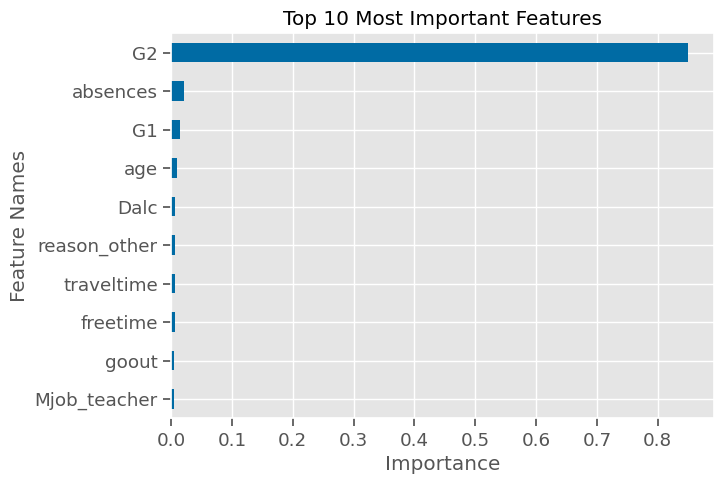

In [24]:
## using the ax to get the fig
fig_ax = ax.get_figure()

fig_ax

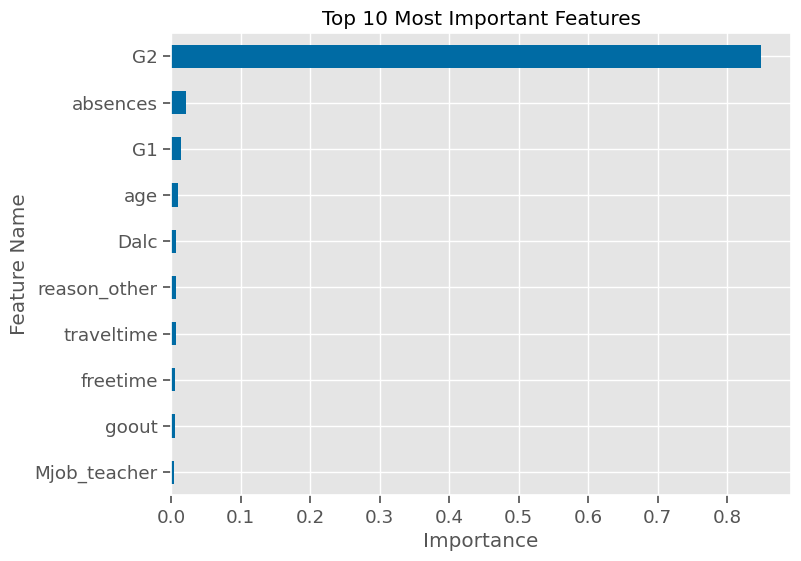

In [25]:
## Using plt.gcf to get the fig
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(8,6), xlabel='Importance',
                                    ylabel='Feature Name', 
                                    title='Top 10 Most Important Features')
fig_gcf = plt.gcf()



What the feature importances tell us:

G2 is by far the single most important feature for predicting G3.
The number of absences is the second most important.
G1, age, Dalc, freetime, are somewhat important
Everything else is unimportant.
Note: we could actually use the feature importances to select which features we want to keep in our model!


What the feature importances don't tell us:
Notice that all of the values on the graph are positive.
There is no +/- directionality with feature importance!
We only know that a feature was heavily used to predict the target, but we DON'T KNOW the actual relationship between the feature and the target.
Does having a higher G2 mean a higher G3?
Do more absences mean a higher G3?
We don't know!

## Defining a Function for Feature Importance

### Create a custom function to get importances:

In [26]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances



###  Create a custom function to plot our importances:

In [27]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax



<AxesSubplot: title={'center': 'All Features - Ranked by Importance'}, xlabel='Importance', ylabel='Feature Names'>

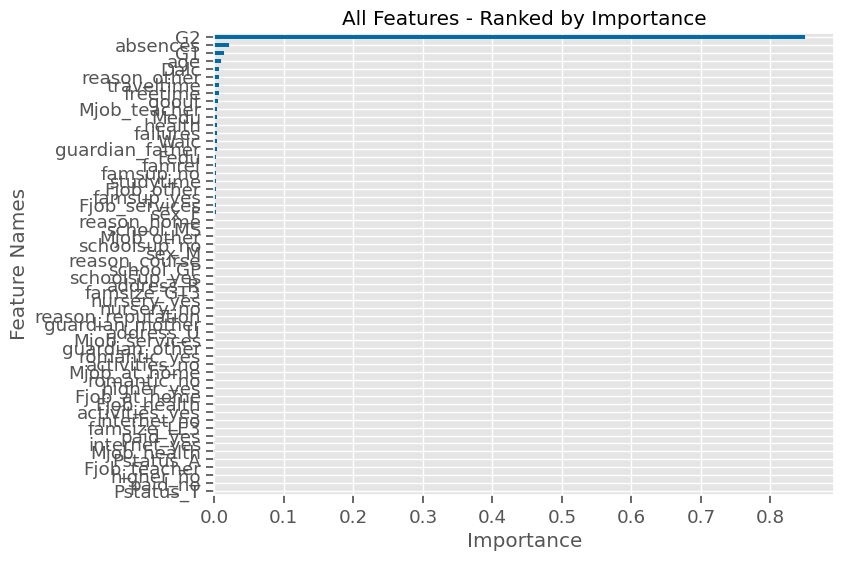

In [28]:
## testing our function
plot_importance(importances)



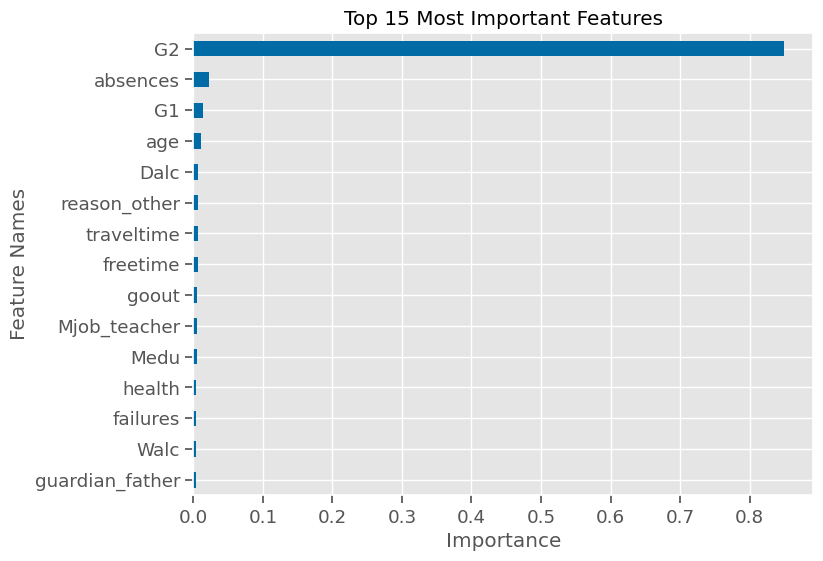

In [29]:
# Now let's change the argument in our function to produce only the top 15 results.
## testing our function
importances = get_importances(reg,sort=True,ascending=False,
                              name="RandomForest Importances")
plot_importance(importances,top_n=15);



# Remaking Our Model - Using Our Functions

Training Data:	R^2= 0.98	RMSE= 0.51
Test Data:	R^2= 0.82	RMSE= 1.27


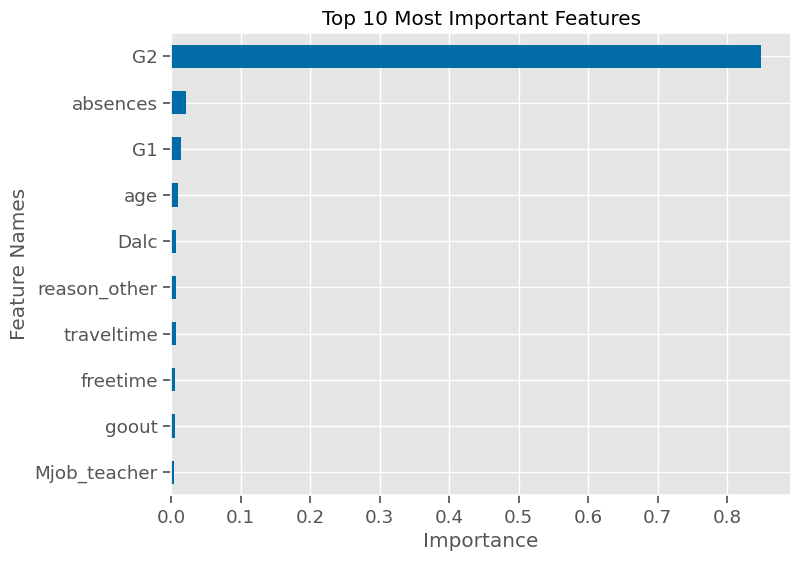

In [30]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df,y_test)
## Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=10);

# Exploring the Most Important Features

In [31]:
importances.sort_values(ascending=False).head(4)

G2          0.849232
absences    0.021766
G1          0.014094
age         0.010327
Name: Feature Importance, dtype: float64

Before we complete the EDA, let's put our DataFrame back together for plotting to include all the train and test values and to ensure our features are matched up with the correct G3 score.

In [32]:
plot_train = pd.concat([X_train_df,y_train],axis=1)
plot_test = pd.concat([X_test_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])
plot_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0,13.0,12.0,13
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,12.0,12
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0,10.0,10.0,10
547,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,4.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,1.0,2.0,0.0,10.0,11.0,11
604,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,18.0,1.0,1.0,3.0,2.0,1.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,9.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,17.0,1.0,1.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,1.0,3.0,0.0,13.0,13.0,14
454,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,16.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,4.0,3.0,9.0,8.0,8
56,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,4.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,15.0,14.0,15
203,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,17.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,3.0,1.0,5.0,3.0,6.0,9.0,9.0,10


## G2

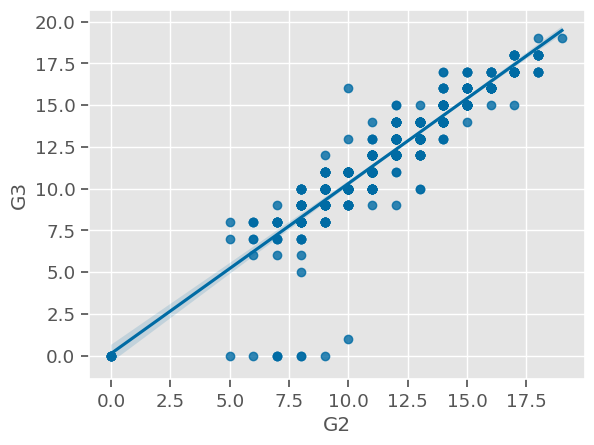

In [33]:
sns.regplot(data=plot_df, x='G2',y='G3');

How well you did in Portuguese last period is going to be a very good indicator of how well you do in Portuguese the next period.

## Absences

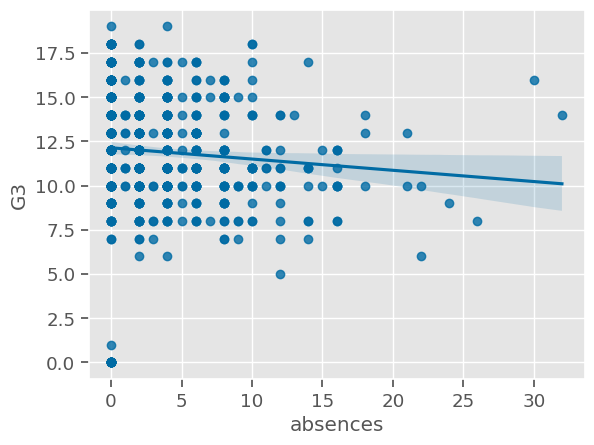

In [34]:
sns.regplot(data=plot_df, x='absences',y='G3');



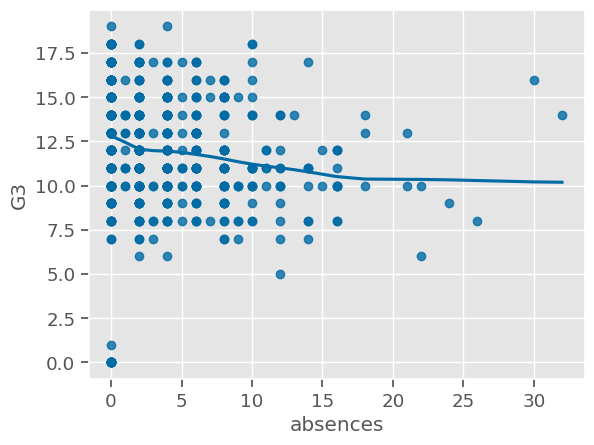

In [35]:
sns.regplot(data=plot_df, x='absences',y='G3', lowess=True);



We can see that there is a general trend where G3 decreases with more absences for about the first 16 absences, and after that, it remains fairly constant.

## G1

<AxesSubplot: xlabel='G1', ylabel='G3'>

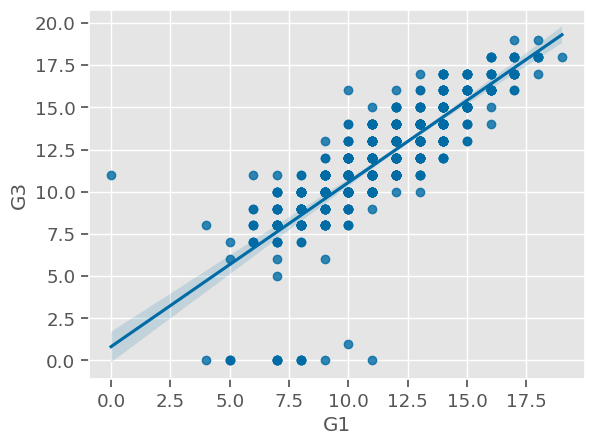

In [36]:
sns.regplot(data=plot_df, x='G1',y='G3')


Not surprisingly G1, is also a strong predictor, like G2.

## Age

<AxesSubplot: xlabel='age', ylabel='G3'>

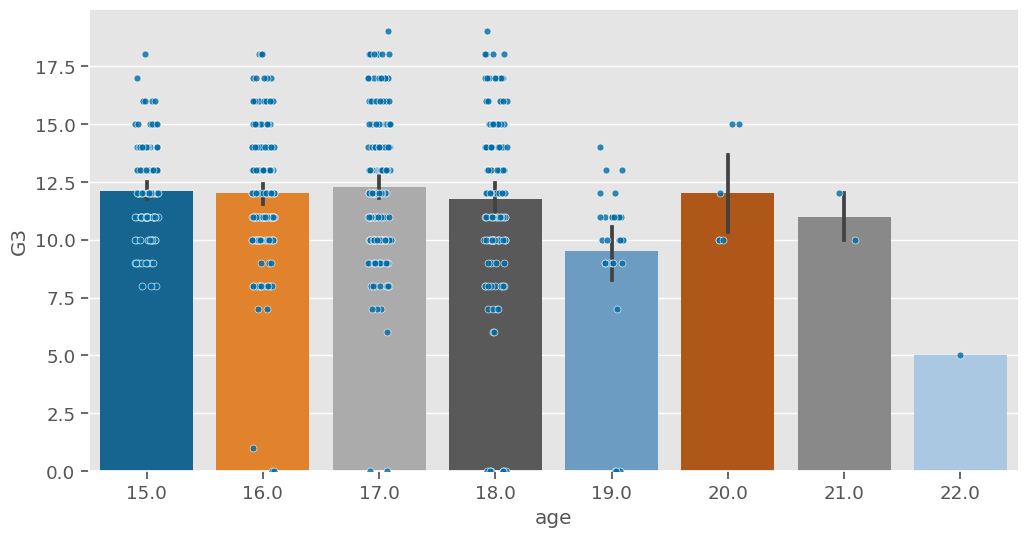

In [38]:
## adding a swarmplot to visualize each point
plt.figure(figsize=(12,6))
sns.stripplot(data=plot_df, x='age',y='G3',size=5,edgecolor='white',
              linewidth=0.5, alpha=.8);
sns.barplot(data=plot_df, x='age',y='G3')#,palette='dark');


It looks like there is a general pattern of older students performing worse in their 3rd period.
This makes sense, as someone who is 19 years old may have been held back previously or had some developmental issues that caused them to start school at an older age.
We don't really know, though! At least not with the tools we have applied thus far.

# Plotting trees

In [39]:
#First, let's slice out the first tree from the forest's .estimators_ and evaluate its performance.

example_tree =  reg.estimators_[0]
example_tree

DecisionTreeRegressor(max_features=1.0, random_state=1657633780)

In [40]:
evaluate_regression(example_tree,X_train_df, y_train, X_test_df,y_test)



Training Data:	R^2= 0.92	RMSE= 0.92
Test Data:	R^2= 0.70	RMSE= 1.67


C:\Users\esnak\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\esnak\anaconda3\envs\dojo-env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


We can see the first tree performed pretty well, with a similar R-squared score for training and test data.

In [41]:
# Let's find out how deep it grew. Large trees can be very difficult to visualize in 1 graph.

example_tree.get_depth()



12

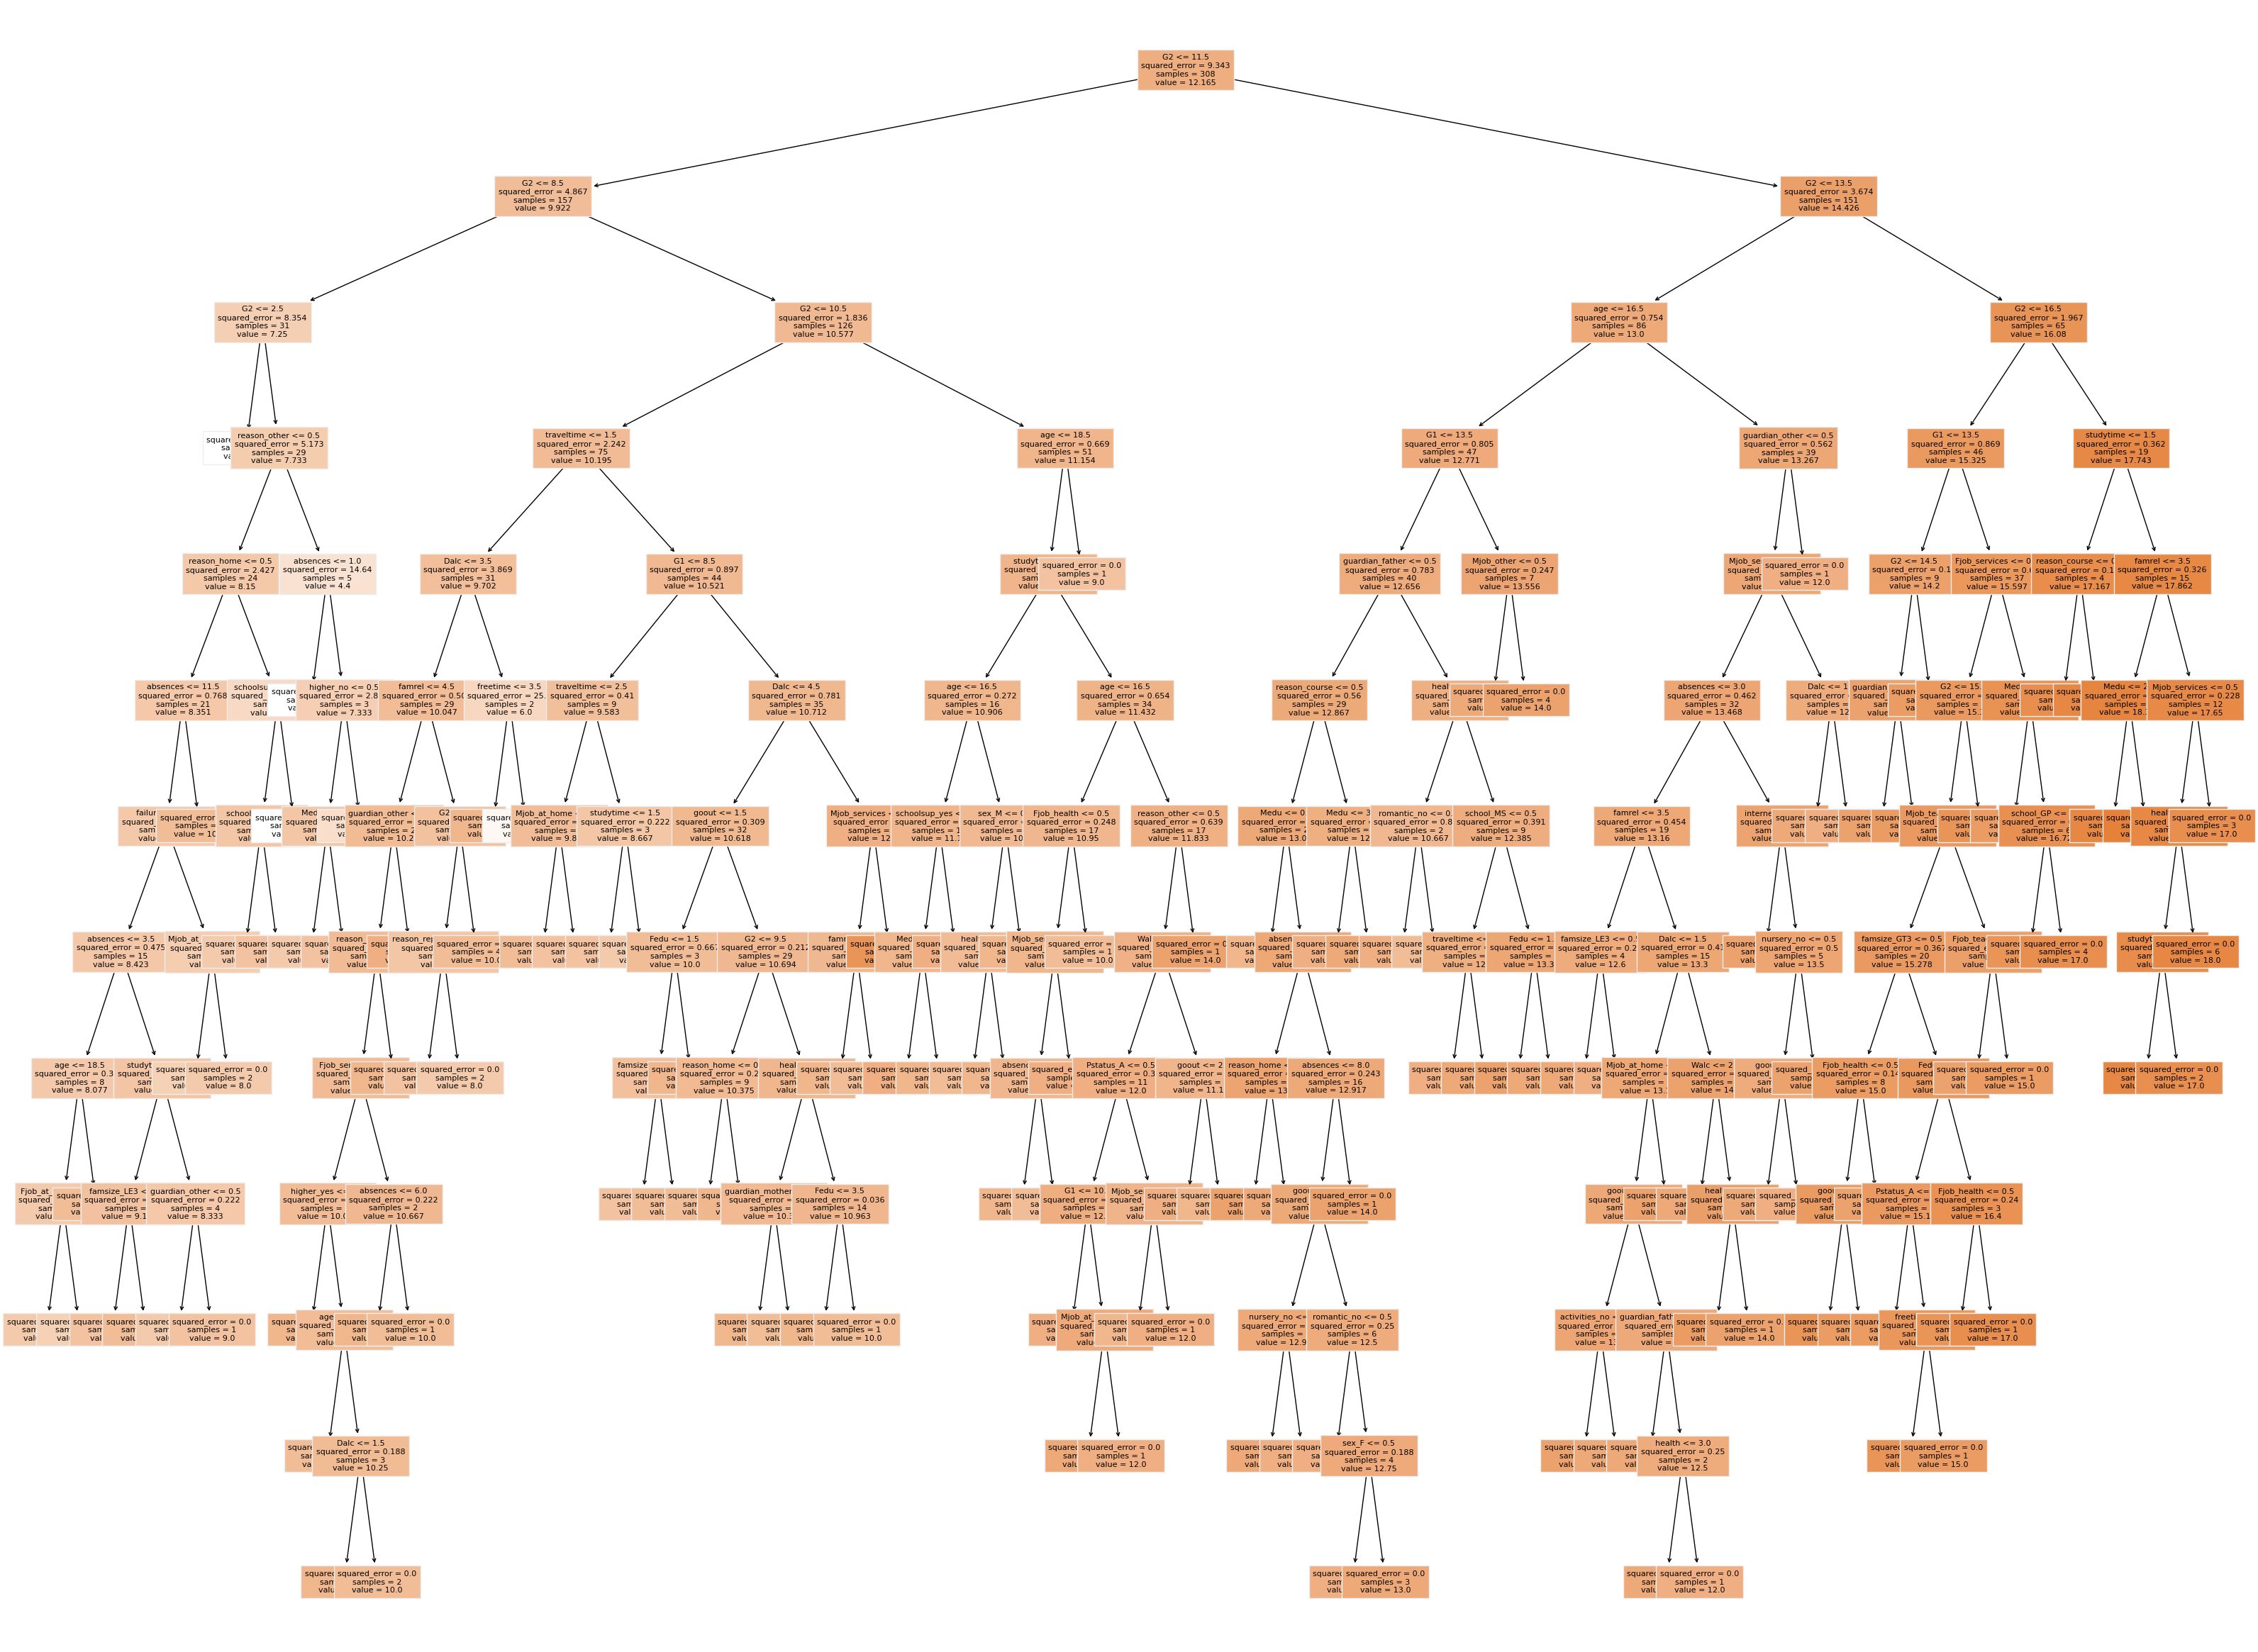

In [42]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, filled=True, feature_names=feature_names,ax=ax, fontsize=8);



In [43]:
fig.savefig('example_tree.png',dpi=300)



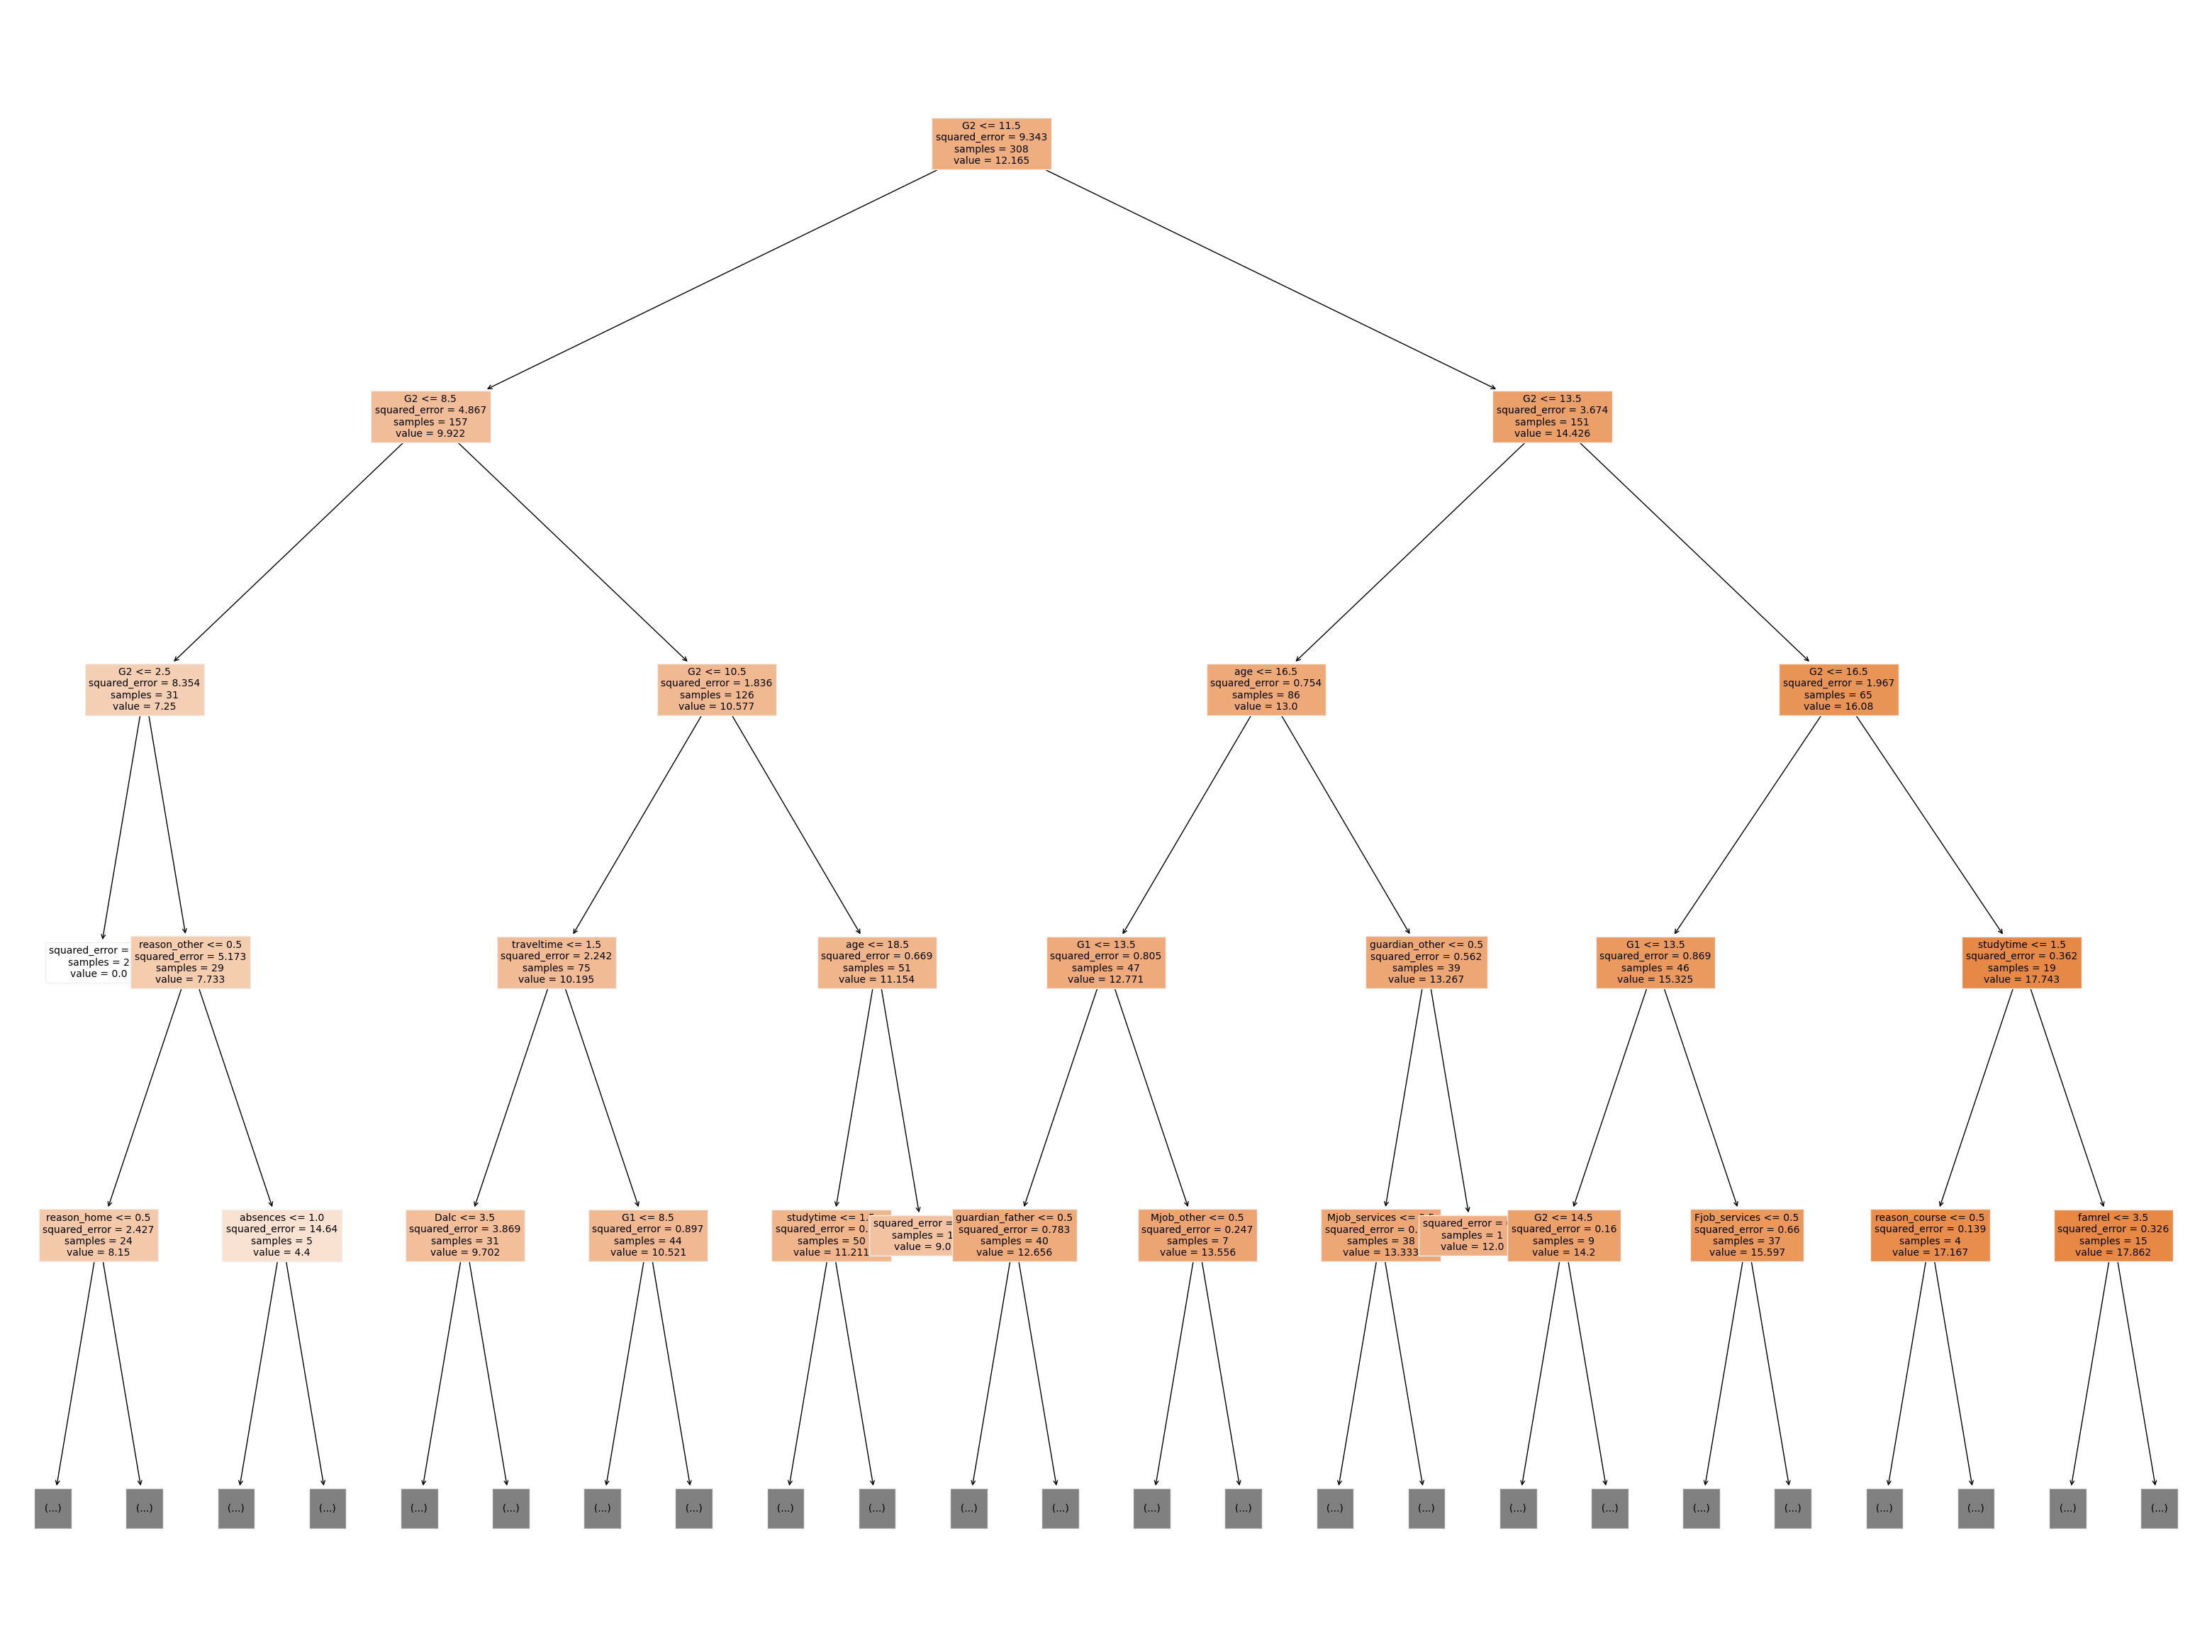

In [44]:
# few layers
fig, ax = plt.subplots(figsize=(40,30))
plot_tree(example_tree, max_depth=4,filled=True,feature_names=feature_names,ax=ax,
         fontsize=10);



If we examine the decision pathway (which starts at the top-center of the image), we can see that the tree used G2 for many splits early on in the tree. In the screenshot below, you can see all of the nodes that split using G2 highlighted in red.

# Task B: Modeling Without Previous Grades

We have also discussed different approaches we could take with this business problem. Our stakeholders do not want to wait until it is "too late" to start interventions with at-risk students. They want to make identify the potential at-risk students BEFORE G1 and G2 grades are earned. To address this, we will remove the G1 and G2 features in our next model to try to predict student grades for period 3 without knowing their prior grades.

In [45]:
## Drop the G1 and G2 features from the x vars
drop_cols = ['G1','G2']
X_train_B = X_train_df.drop(columns=drop_cols)
X_test_B = X_test_df.drop(columns=drop_cols)
feature_names_B = X_train_B.columns
X_train_B.head(3)


,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,...,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
54,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0,3.0,3.0,1.0,1.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,0.0
208,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0
23,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0,2.0,2.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,4.0,5.0,2.0


Now that we have dropped G1 and G2, let's fit our model and call our 3 custom functions to evaluate it, get the feature importances, and visualize them.

Training Data:	R^2= 0.89	RMSE= 1.07
Test Data:	R^2= 0.37	RMSE= 2.40


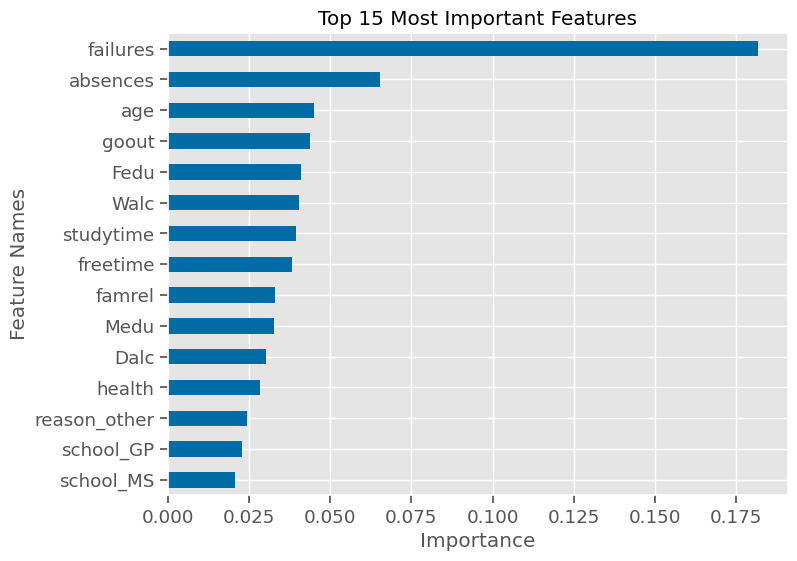

In [46]:
reg_B = RandomForestRegressor(random_state = SEED)
reg_B.fit(X_train_B, y_train)
evaluate_regression(reg_B, X_train_B, y_train, X_test_B,y_test)
## Saving the feature importances
importances = get_importances(reg_B, sort=True, ascending=False)
plot_importance(importances, top_n=15);



Our model's performance has decreased dramatically without those features. Our testing R-squared plummeted from .71 to .35
Many more features are showing visible degrees of importance than before.

## Permutation Importance

Examines which feature caused the biggest decrease in the model's performance, and it uses this information to determine the "permutation importance."

In [47]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg_B, X_test_B, y_test,n_repeats =5)
r.keys()



dict_keys(['importances_mean', 'importances_std', 'importances'])

The result is a dictionary, and we want to pull out the importances_mean and make it a Pandas Series so it is easy to work with.

In [48]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_B.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances


failures             0.334811
studytime            0.033311
absences             0.030992
Dalc                 0.024983
goout                0.022102
age                  0.018472
famrel               0.016765
higher_no            0.016039
health               0.014936
Medu                 0.014026
higher_yes           0.010932
famsup_yes           0.008456
schoolsup_yes        0.007464
sex_F                0.007206
traveltime           0.006389
sex_M                0.006334
freetime             0.005778
Walc                 0.005744
reason_other         0.005384
schoolsup_no         0.005248
activities_yes       0.004093
address_R            0.003946
Mjob_teacher         0.003831
famsup_no            0.003824
Mjob_health          0.003721
guardian_mother      0.002981
address_U            0.002660
reason_course        0.002298
romantic_no          0.002219
Pstatus_A            0.001499
Mjob_services        0.001432
activities_no        0.001209
reason_home          0.001103
guardian_f

In [49]:
## color -coding top 5 bars
highlight_feats = importances.sort_values(ascending=True).tail(5).index
highlight_feats



Index(['Fedu', 'goout', 'age', 'absences', 'failures'], dtype='object')

In [50]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'    
    else:
        colors_dict[col] = '#006ba4'
colors_dict



{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': '#006ba4',
 'studytime': '#006ba4',
 'freetime': '#006ba4',
 'famrel': '#006ba4',
 'Medu': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_GP': '#006ba4',
 'school_MS': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'reason_home': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_reputation': '#006ba4',
 'schoolsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_other': '#006ba4',
 'famsup_no': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'famsup_yes': '#006ba4',
 'activities_no': '#006ba4',
 'reason_course': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_yes': '#006ba4',
 'sex_F': '#006ba4',
 'nursery_yes': '#006ba4',
 'Mjob_services': '#006ba4',
 'guardian_mother': '#006ba4',
 'famsize_GT3': '#006ba4',
 'famsize_LE3': '

In [55]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict



In [56]:
colors_top7 = get_color_dict(importances, top_n=7)
colors_top7



{'failures': 'green',
 'absences': 'green',
 'age': 'green',
 'goout': 'green',
 'Fedu': 'green',
 'Walc': 'green',
 'studytime': 'green',
 'freetime': '#006ba4',
 'famrel': '#006ba4',
 'Medu': '#006ba4',
 'Dalc': '#006ba4',
 'health': '#006ba4',
 'reason_other': '#006ba4',
 'school_GP': '#006ba4',
 'school_MS': '#006ba4',
 'traveltime': '#006ba4',
 'higher_no': '#006ba4',
 'Mjob_teacher': '#006ba4',
 'reason_home': '#006ba4',
 'Fjob_teacher': '#006ba4',
 'schoolsup_yes': '#006ba4',
 'higher_yes': '#006ba4',
 'reason_reputation': '#006ba4',
 'schoolsup_no': '#006ba4',
 'Fjob_services': '#006ba4',
 'Mjob_other': '#006ba4',
 'famsup_no': '#006ba4',
 'Mjob_at_home': '#006ba4',
 'famsup_yes': '#006ba4',
 'activities_no': '#006ba4',
 'reason_course': '#006ba4',
 'Fjob_other': '#006ba4',
 'sex_M': '#006ba4',
 'activities_yes': '#006ba4',
 'sex_F': '#006ba4',
 'nursery_yes': '#006ba4',
 'Mjob_services': '#006ba4',
 'guardian_mother': '#006ba4',
 'famsize_GT3': '#006ba4',
 'famsize_LE3': '#006

In [57]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax


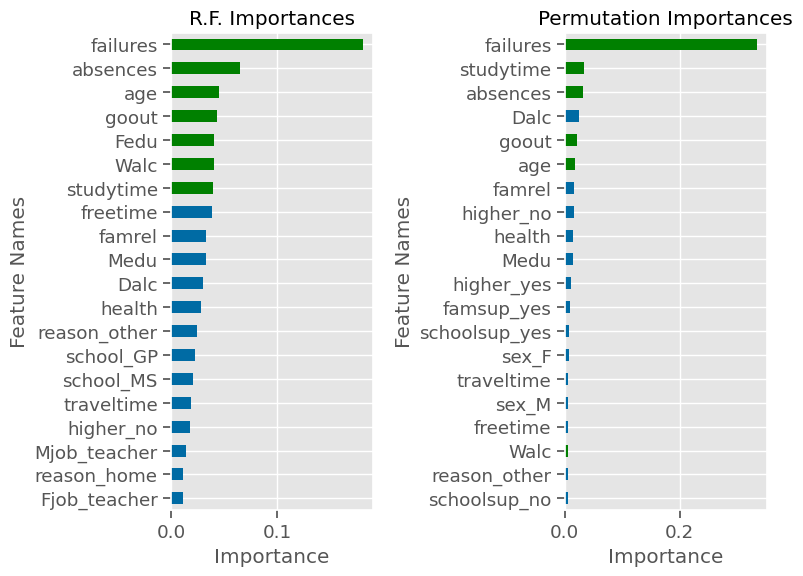

In [58]:
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
n = 20 # setting the # of features to use for both subplots
plot_importance_color_ax(importances, top_n=n, ax=axes[0],
                         color_dict= colors_top7)
plot_importance_color_ax(permutation_importances, top_n=n, ax=axes[1],
                         color_dict=colors_top7)
axes[0].set(title='R.F. Importances')
axes[1].set(title='Permutation Importances')
fig.tight_layout()


The random forest importances is biased towards considering continuous features to be more important. All of the top 10 features are continuous.

Whereas permutation Importance judged all features without a bias towards continuous features. It identified a categorical feature in the top 10 (higher_no).